# Лабораторная работа № 2

| Номер в списке | Год  | Ошибка                                              | Столбцы     |   |
|----------------|------|-----------------------------------------------------|-------------|---|
| 9              | 2014 | $$MAE = \frac 1n * \sum_{j=1}^{n}(y_j - \bar y_j)$$ | C O N M J I |   |
|                |      |                                                     |             |   |
|                |      |                                                     |             |   |

In [128]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [129]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [130]:
FullTable = pd.read_excel('2015.xlsx', sheet_name='WORKING FILE')

In [131]:
c = 'BBL'
o = 'Weather Normalized Source EUI'
n = 'Source EUI'
m = 'Weather Normalized Site EUI'
j = 'BBL on the Covered Buildings List'
i = 'Zip Code'
h = 'Total GHG Emissions'
label = 'ENERGY STAR Score'

In [132]:
df = FullTable[[c,o,n,m,j,i,h,'Reported Property Floor Area','Municipally Supplied Potable Water - Indoor Intensity',label]] 

### Информация по датасету до обработки

In [133]:
df.head()

,BBL,Weather Normalized Source EUI,Source EUI,Weather Normalized Site EUI,BBL on the Covered Buildings List,Zip Code,Total GHG Emissions,Reported Property Floor Area,Municipally Supplied Potable Water - Indoor Intensity,ENERGY STAR Score
0,1009970029,166.8,166.1,54.2,Yes,10036.0,3054.3,686902,Not Available,90.1
1,1013150001,184.1,186.8,83.4,Yes,10017.0,2453.3,384432,Not Available,86
2,1009990019,159.4,164.6,63.2,Yes,10036.0,2961.2,572369,Not Available,84
3,1013190047,215,220.7,96.6,Yes,10017.0,2731.4,362578,Not Available,75
4,1009950005,285.8,287,113.6,Yes,10036.0,13661.8,1601977,Not Available,61


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   BBL                                                    13974 non-null  int64  
 1   Weather Normalized Source EUI                          11916 non-null  object 
 2   Source EUI                                             11916 non-null  object 
 3   Weather Normalized Site EUI                            11916 non-null  object 
 4   BBL on the Covered Buildings List                      13974 non-null  object 
 5   Zip Code                                               11614 non-null  float64
 6   Total GHG Emissions                                    13974 non-null  object 
 7   Reported Property Floor Area                           13974 non-null  object 
 8   Municipally Supplied Potable Water - Indoor In

In [135]:
df.shape

(13974, 10)

# Работа с данными

## Приведение типов

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   BBL                                                    13974 non-null  int64  
 1   Weather Normalized Source EUI                          11916 non-null  object 
 2   Source EUI                                             11916 non-null  object 
 3   Weather Normalized Site EUI                            11916 non-null  object 
 4   BBL on the Covered Buildings List                      13974 non-null  object 
 5   Zip Code                                               11614 non-null  float64
 6   Total GHG Emissions                                    13974 non-null  object 
 7   Reported Property Floor Area                           13974 non-null  object 
 8   Municipally Supplied Potable Water - Indoor In

In [137]:
df[label] = pd.to_numeric(df[label], errors='coerce')
df[o] = pd.to_numeric(df[o], errors='coerce')
df[n] = pd.to_numeric(df[n], errors='coerce')
df[m] = pd.to_numeric(df[m], errors='coerce')
df['Total GHG Emissions'] = pd.to_numeric(df['Total GHG Emissions'], errors='coerce')
df['Reported Property Floor Area'] = pd.to_numeric(df['Reported Property Floor Area'], errors='coerce')
df['Municipally Supplied Potable Water - Indoor Intensity'] = pd.to_numeric(df['Municipally Supplied Potable Water - Indoor Intensity'], 
                                                                            errors='coerce')


<ipython-input-137-dfd16ad88a9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = pd.to_numeric(df[label], errors='coerce')
<ipython-input-137-dfd16ad88a9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[o] = pd.to_numeric(df[o], errors='coerce')
<ipython-input-137-dfd16ad88a9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   BBL                                                    13974 non-null  int64  
 1   Weather Normalized Source EUI                          8712 non-null   float64
 2   Source EUI                                             10610 non-null  float64
 3   Weather Normalized Site EUI                            8712 non-null   float64
 4   BBL on the Covered Buildings List                      13974 non-null  object 
 5   Zip Code                                               11614 non-null  float64
 6   Total GHG Emissions                                    10689 non-null  float64
 7   Reported Property Floor Area                           11302 non-null  float64
 8   Municipally Supplied Potable Water - Indoor In

Text(0.5, 1.0, 'Missing values heatmap')

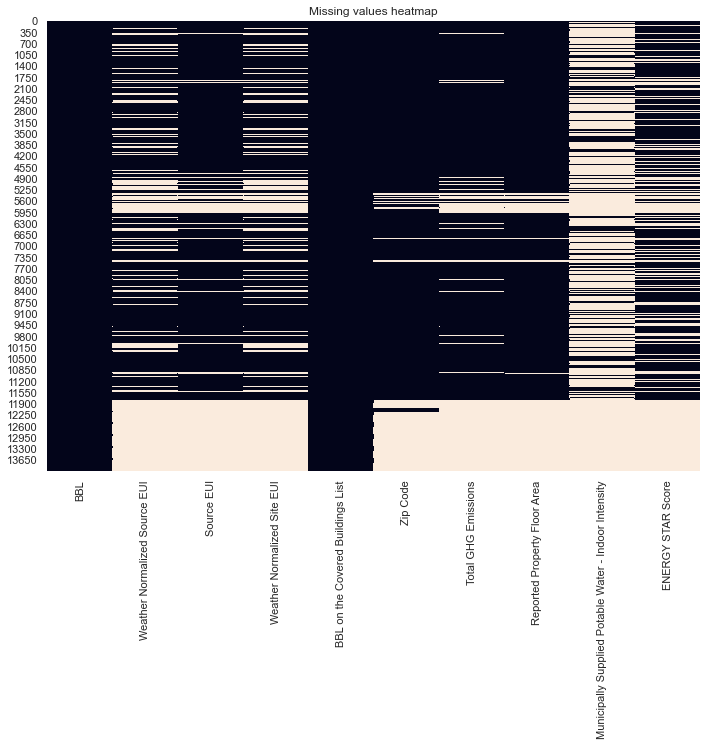

In [139]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [140]:
df.isnull().sum()

BBL                                                          0
Weather Normalized Source EUI                             5262
Source EUI                                                3364
Weather Normalized Site EUI                               5262
BBL on the Covered Buildings List                            0
Zip Code                                                  2360
Total GHG Emissions                                       3285
Reported Property Floor Area                              2672
Municipally Supplied Potable Water - Indoor Intensity    10502
ENERGY STAR Score                                         5468
dtype: int64

### Работа с BBL

In [141]:
districts = {'1':'Manhattan', "2":'Bronx', "3":'Brooklyn',"4":'Queens', "5":'Staten Island'}

In [142]:
df['BBL'] = df['BBL'].astype(str)

<ipython-input-142-8695a291f323>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BBL'] = df['BBL'].astype(str)


In [143]:
borough = []
blockNumber = []
lotNumber = []


for i in range(0, len(df)):
    borough.append(districts[df.iloc[i][0][0]])
    blockNumber.append(df.iloc[i][0][1:6])
    lotNumber.append(df.iloc[i][0][:6])

In [144]:
borough = pd.Series(borough, name='Borough')
blockNumber = pd.Series(blockNumber, name='Block Number')
lotNumber = pd.Series(lotNumber, name='Lot Number')

In [145]:
df = df.drop('BBL', axis=1)

In [146]:
df = pd.concat([df, borough, blockNumber, lotNumber], axis=1) # Не слева, а справа плак(

<AxesSubplot:>

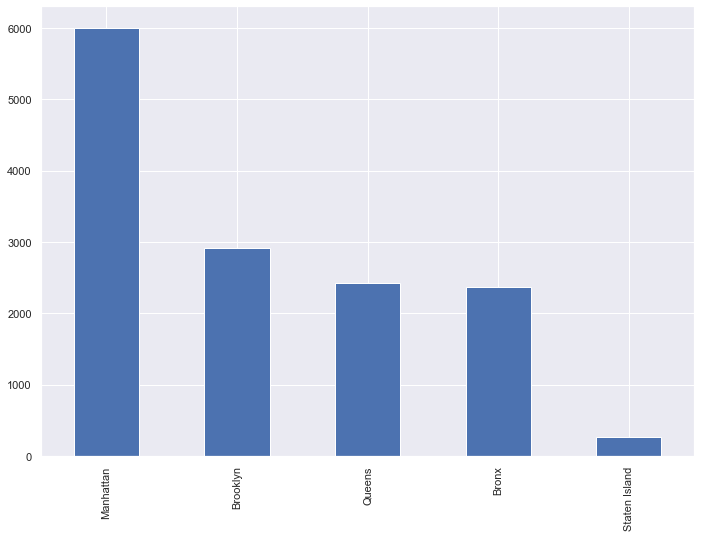

In [147]:
df['Borough'].value_counts().plot(kind='bar')

In [148]:
df['Borough'].value_counts()

Manhattan        6000
Brooklyn         2921
Queens           2421
Bronx            2367
Staten Island     265
Name: Borough, dtype: int64

### Распределение NaN в лейблах по районам

##### Очень интересны пропущенные значения в конце с 11900 по 13650 строку

In [149]:
df['Borough'].value_counts()

Manhattan        6000
Brooklyn         2921
Queens           2421
Bronx            2367
Staten Island     265
Name: Borough, dtype: int64

In [150]:
ManhNaNLabel =len(df[(df['Borough'] == 'Manhattan') & 
    (df[label].isnull())
  ])

QueensNaNLabel = len(df[(df['Borough'] == 'Queens') & 
    (df[label].isnull())
  ])

BronxNaNLabel = len(df[(df['Borough'] == 'Bronx') & 
    (df[label].isnull())
  ])

BrooklynNaNLabel = len(df[(df['Borough'] == 'Brooklyn') & 
    (df[label].isnull())
  ])

StatenIslandNaNLabel = len(df[(df['Borough'] == 'Staten Island') & 
    (df[label].isnull())
  ])

<BarContainer object of 5 artists>

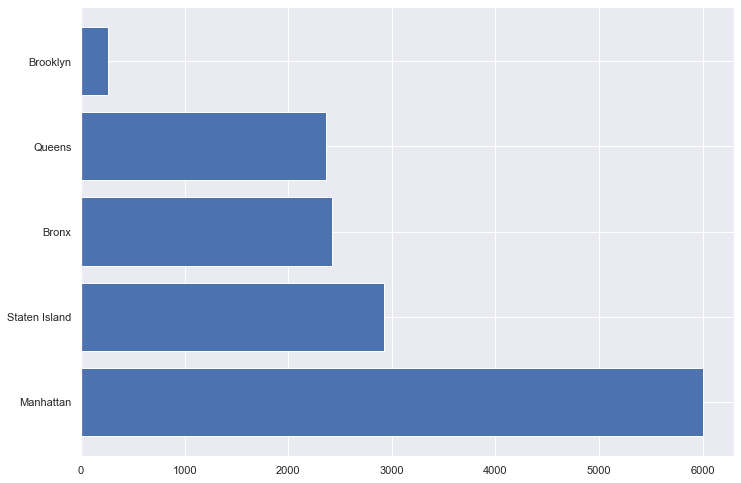

In [151]:
# Распределение данных по районам
plt.barh(df['Borough'].unique(), df['Borough'].value_counts())

In [152]:
df['Borough'].value_counts()

Manhattan        6000
Brooklyn         2921
Queens           2421
Bronx            2367
Staten Island     265
Name: Borough, dtype: int64

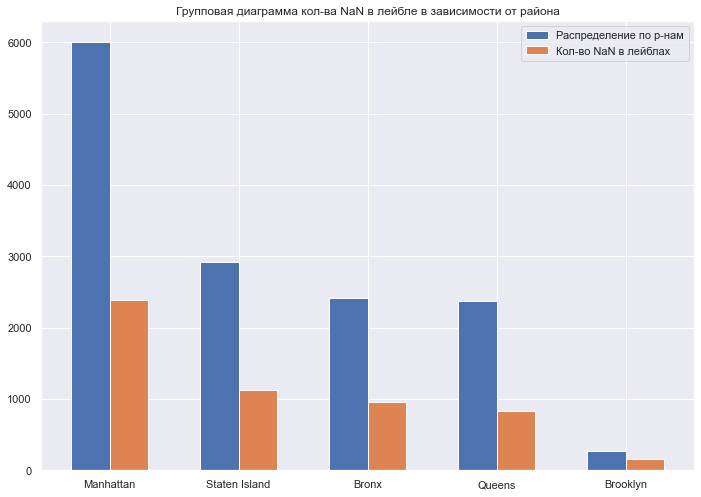

In [153]:
## Распределение NaN в лейбле в каждом районе

BoroughNaNLabelArray = [ManhNaNLabel, BrooklynNaNLabel, QueensNaNLabel, BronxNaNLabel, StatenIslandNaNLabel]



fig, ax = plt.subplots()
x = np.arange(len(BoroughNaNLabelArray))
width = 0.3

rects1 = ax.bar(x - width / 2, df['Borough'].value_counts(), width, label = 'Распределение по р-нам')
rects2 = ax.bar(x + width / 2, BoroughNaNLabelArray,         width, label = 'Кол-во NaN в лейблах')

ax.set_title('Групповая диаграмма кол-ва NaN в лейбле в зависимости от района')
ax.set_xticks(x)
ax.set_xticklabels(df['Borough'].unique())
ax.legend()

## УДАЛЕНИЕ NaN в Label 

In [154]:
df = df.dropna(subset = [label])

Text(0.5, 1.0, 'Missing values heatmap')

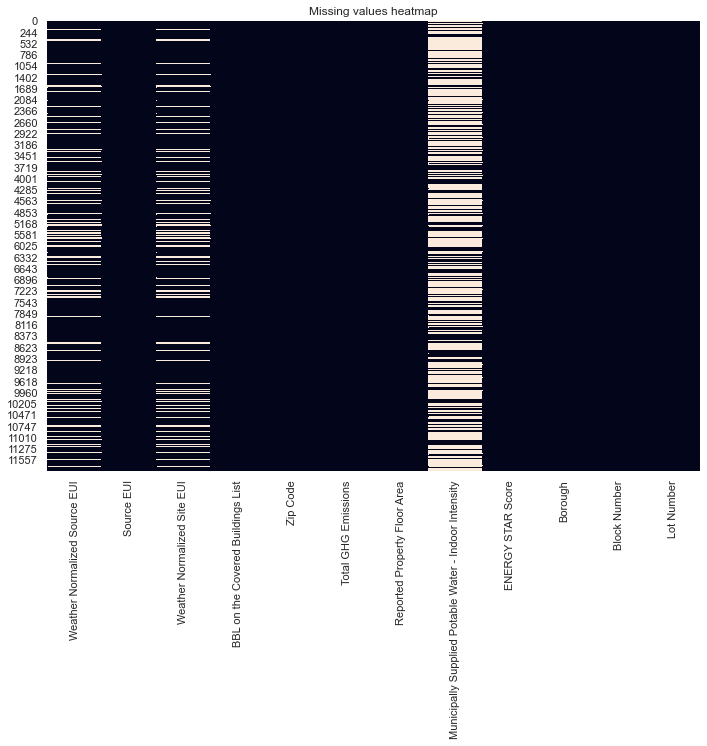

In [155]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

### Работа с Potable Water

In [156]:
df = df = df.dropna(subset = ['Municipally Supplied Potable Water - Indoor Intensity'])

### Работа с Weather-признаками 

Text(0.5, 1.0, 'Missing values heatmap')

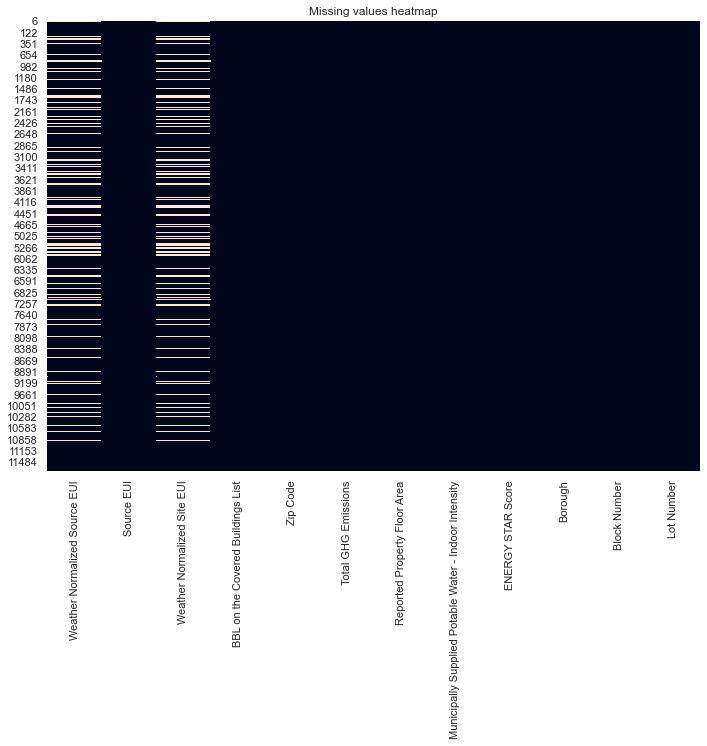

In [157]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [158]:
df.isnull().sum()

Weather Normalized Source EUI                            494
Source EUI                                                 0
Weather Normalized Site EUI                              494
BBL on the Covered Buildings List                          0
Zip Code                                                   1
Total GHG Emissions                                        2
Reported Property Floor Area                               0
Municipally Supplied Potable Water - Indoor Intensity      0
ENERGY STAR Score                                          0
Borough                                                    0
Block Number                                               0
Lot Number                                                 0
dtype: int64

In [159]:
df = df.dropna(subset=['Weather Normalized Site EUI'])

df['Weather Normalized Site EUI'].fillna(df['Weather Normalized Site EUI'].mean(), inplace=True)
df['Weather Normalized Source EUI'].fillna(df['Weather Normalized Source EUI'].mean(), inplace=True)

In [160]:
df.isnull().sum()

Weather Normalized Source EUI                            0
Source EUI                                               0
Weather Normalized Site EUI                              0
BBL on the Covered Buildings List                        0
Zip Code                                                 1
Total GHG Emissions                                      2
Reported Property Floor Area                             0
Municipally Supplied Potable Water - Indoor Intensity    0
ENERGY STAR Score                                        0
Borough                                                  0
Block Number                                             0
Lot Number                                               0
dtype: int64

### Работа с ZipCode

In [161]:
# Не оч

df['Zip Code'] = df['Zip Code'].fillna(0)
df['Zip Code'] = df['Zip Code'].astype(int)

In [162]:
df.loc[df['Zip Code'] == 0]

,Weather Normalized Source EUI,Source EUI,Weather Normalized Site EUI,BBL on the Covered Buildings List,Zip Code,Total GHG Emissions,Reported Property Floor Area,Municipally Supplied Potable Water - Indoor Intensity,ENERGY STAR Score,Borough,Block Number,Lot Number
11277,0.0,0.0,0.0,Yes,0,0.0,0.0,0.0,0.0,Bronx,02443,202443


In [163]:
df.loc[(df['Zip Code'] == 0), 'Zip Code'] = df['Zip Code'].mode()

In [164]:
df.isnull().sum()

Weather Normalized Source EUI                            0
Source EUI                                               0
Weather Normalized Site EUI                              0
BBL on the Covered Buildings List                        0
Zip Code                                                 1
Total GHG Emissions                                      2
Reported Property Floor Area                             0
Municipally Supplied Potable Water - Indoor Intensity    0
ENERGY STAR Score                                        0
Borough                                                  0
Block Number                                             0
Lot Number                                               0
dtype: int64

In [165]:
df['Zip Code'] = df.dropna(subset=['Zip Code'])

In [166]:
df.isnull().sum()

Weather Normalized Source EUI                            0
Source EUI                                               0
Weather Normalized Site EUI                              0
BBL on the Covered Buildings List                        0
Zip Code                                                 1
Total GHG Emissions                                      2
Reported Property Floor Area                             0
Municipally Supplied Potable Water - Indoor Intensity    0
ENERGY STAR Score                                        0
Borough                                                  0
Block Number                                             0
Lot Number                                               0
dtype: int64

In [167]:
df = df.drop(['Zip Code'], axis=1)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['Zip Code'].value_counts())

(df['Zip Code'].value_counts() < 15).sum()

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 6 to 11791
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Weather Normalized Source EUI                          2209 non-null   float64
 1   Source EUI                                             2209 non-null   float64
 2   Weather Normalized Site EUI                            2209 non-null   float64
 3   BBL on the Covered Buildings List                      2209 non-null   object 
 4   Total GHG Emissions                                    2207 non-null   float64
 5   Reported Property Floor Area                           2209 non-null   float64
 6   Municipally Supplied Potable Water - Indoor Intensity  2209 non-null   float64
 7   ENERGY STAR Score                                      2209 non-null   float64
 8   Borough                                        

### Работа с Total GHG Emissions

In [169]:
df['Total GHG Emissions'].fillna(df['Total GHG Emissions'].mean(), inplace=True)

In [170]:
df.isnull().sum()

Weather Normalized Source EUI                            0
Source EUI                                               0
Weather Normalized Site EUI                              0
BBL on the Covered Buildings List                        0
Total GHG Emissions                                      0
Reported Property Floor Area                             0
Municipally Supplied Potable Water - Indoor Intensity    0
ENERGY STAR Score                                        0
Borough                                                  0
Block Number                                             0
Lot Number                                               0
dtype: int64

### Работа c BBL on the Covered Buildings List

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 6 to 11791
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Weather Normalized Source EUI                          2209 non-null   float64
 1   Source EUI                                             2209 non-null   float64
 2   Weather Normalized Site EUI                            2209 non-null   float64
 3   BBL on the Covered Buildings List                      2209 non-null   object 
 4   Total GHG Emissions                                    2209 non-null   float64
 5   Reported Property Floor Area                           2209 non-null   float64
 6   Municipally Supplied Potable Water - Indoor Intensity  2209 non-null   float64
 7   ENERGY STAR Score                                      2209 non-null   float64
 8   Borough                                        

In [172]:
df['BBL on the Covered Buildings List'].unique()

array(['Yes'], dtype=object)

In [173]:
df = df.drop(['BBL on the Covered Buildings List'], axis = 1)

### Работа с Block Number

In [174]:
df['Block Number'].value_counts()

02180    13
02136     9
02453     9
00016     7
01277     6
         ..
00851     1
01502     1
02036     1
01496     1
00188     1
Name: Block Number, Length: 1547, dtype: int64

In [175]:
df = df.drop(['Block Number'], axis = 1)

### Работа с Lot Number

In [176]:
df['Lot Number'].value_counts()

102180    13
102136     9
202453     9
100016     7
102179     6
          ..
304271     1
305240     1
301227     1
203306     1
406852     1
Name: Lot Number, Length: 1671, dtype: int64

In [177]:
df = df.drop(['Lot Number'], axis = 1)

### Работа с категориальными признаками (Zip Code and Borough)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 6 to 11791
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Weather Normalized Source EUI                          2209 non-null   float64
 1   Source EUI                                             2209 non-null   float64
 2   Weather Normalized Site EUI                            2209 non-null   float64
 3   Total GHG Emissions                                    2209 non-null   float64
 4   Reported Property Floor Area                           2209 non-null   float64
 5   Municipally Supplied Potable Water - Indoor Intensity  2209 non-null   float64
 6   ENERGY STAR Score                                      2209 non-null   float64
 7   Borough                                                2209 non-null   object 
dtypes: float64(7), object(1)
memory usage: 155.3+ KB

In [179]:
ohc_borough = pd.get_dummies(df['Borough']) 

#### Объединение таблиц

In [180]:
df = df.drop(['Borough', 'Zip Code'], axis = 1, errors='ignore')

In [181]:
df = pd.concat([df, ohc_borough], axis= 1)
#df = pd.concat([df, ohc_zipcode], axis= 1)

# Обучение модели

In [182]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics

In [183]:
labels = df['ENERGY STAR Score']
df =df.drop(['ENERGY STAR Score'], axis = 1)

In [184]:
df

,Weather Normalized Source EUI,Source EUI,Weather Normalized Site EUI,Total GHG Emissions,Reported Property Floor Area,Municipally Supplied Potable Water - Indoor Intensity,Bronx,Brooklyn,Manhattan,Queens,Staten Island
6,221.5,225.9,82.7,4982.7,743915.0,27.06,0,0,1,0,0
8,264.5,269.1,129.0,12402.5,1272119.0,0.00,0,0,1,0,0
11,202.6,202.6,78.8,11474.5,1869756.0,17.34,0,0,1,0,0
16,207.5,210.5,78.6,3056.8,487501.0,15.35,0,0,1,0,0
22,201.9,203.6,76.2,15889.6,2613986.0,21.96,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11764,74.9,78.5,56.5,310.1,68750.0,39.25,0,0,1,0,0
11769,109.7,111.8,51.0,444.5,123700.0,33.90,0,1,0,0,0
11771,181.5,183.1,87.2,306.5,50932.0,60.10,0,1,0,0,0
11775,100.8,107.0,95.9,480.4,64058.0,68.03,0,0,1,0,0


In [193]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                    test_size = 0.3,
                                                   random_state = 42)


In [194]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1546, 11)
(663, 11)
(1546,)
(663,)


Text(0.5, 1.0, 'Label split for test')

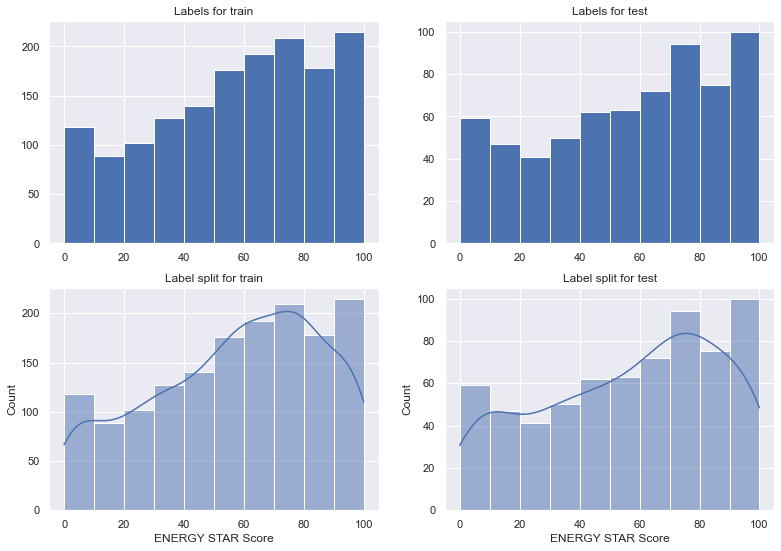

In [195]:
plt.figure(figsize=(13, 9))


plt.subplot(2,2,1)
plt.hist(y_train)
plt.title('Labels for train')

plt.subplot(2,2,2)
plt.hist(y_test)
plt.title('Labels for test')

plt.subplot(2,2,3)
sns.histplot(y_train, kde=True, bins = 10)
plt.title('Label split for train')

plt.subplot(2,2,4)
sns.histplot(y_test, kde=True, bins = 10)
plt.title('Label split for test')

(array([ 59.,  47.,  41.,  50.,  62.,  63.,  72.,  94.,  75., 100.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

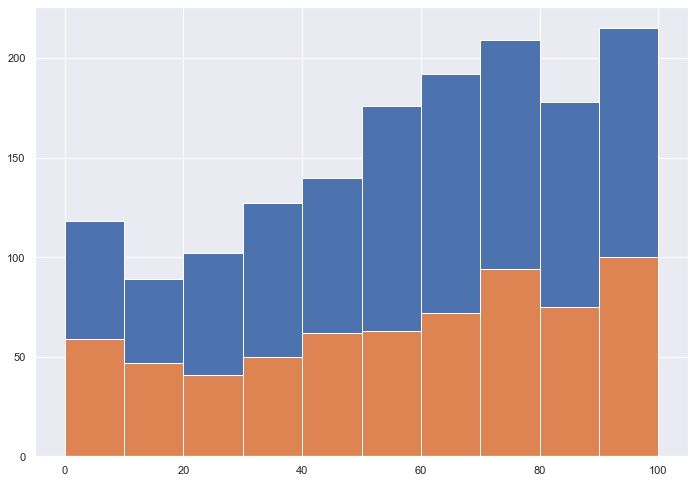

In [196]:
plt.hist(y_train)
plt.hist(y_test)

In [197]:
# Model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [198]:
prediction = regressor.predict(X_test)
metrics.mean_absolute_error(y_test, prediction)

27.416505166934268

In [199]:
print(y_test[:10])

4036      92.0
8264      24.0
7891      66.0
2114      14.0
8324       8.0
7662      99.0
3800     100.0
1888      72.0
5340      78.0
10845      7.0
Name: ENERGY STAR Score, dtype: float64


In [200]:
print(prediction[:10])

[55.79367803 54.87430696 60.26745462 60.61429541 59.79557323 59.73737819
 62.95209057 57.96757289 61.65753015 57.7673907 ]
